In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Challenge: Validating a linear regression

Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as with Naive Bayes classifiers – the holdout method and cross-validation method are both available. Your goal is to achieve a model with a consistent R-squared value and only statistically significant parameters across multiple samples.

Since my model to date used NY 2013 dataset, I will validate it using CA 2013 data (from the FBI:UCR website). 

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

pd.options.display.float_format = '{:,.0f}'.format

ca_crime_df = pd.read_excel('./crimes/CA_crimes.xls', header=4)
ca_crime_df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,"31,165",198,2,nan,15,52,129,886,381,372,133,17
1,Agoura Hills,"20,762",19,0,nan,2,10,7,306,109,185,12,7
2,Alameda,"76,206",158,0,nan,10,85,63,"1,902",287,"1,285",330,17
3,Albany,"19,104",29,0,nan,1,24,4,557,94,388,75,7
4,Alhambra,"84,710",163,1,nan,9,81,72,"1,774",344,"1,196",234,7


In [3]:
%%capture
%run lesson_4_project_4.ipynb

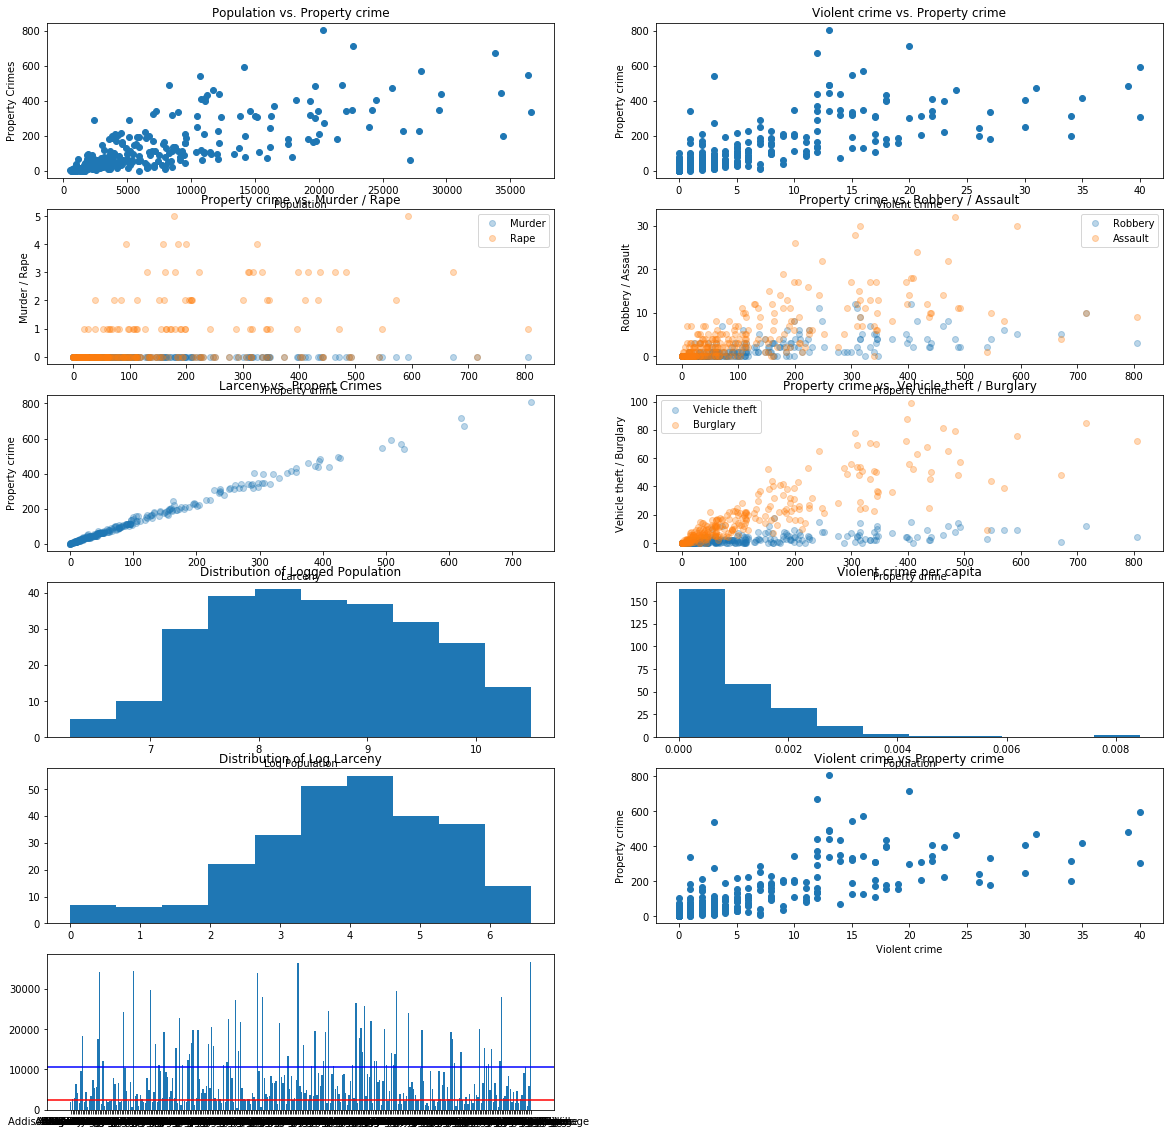

R-squared score: 


0.9815389310789031

In [4]:
ca_crime_df = clean_data(ca_crime_df, 'CA')

display_relevant_plots(crime_df)

new_Y = ca_crime_df['Property crime'].values.reshape(-1, 1)
new_X = ca_crime_df[['Log Population', 'Violent crime', 'Larceny']]
print('R-squared score: ')
regr.score(new_X, new_Y)

## Iterate

Based on the results of my validation test, I will create a revised model, and then test both old and new models on a new holdout or set of folds.

[Brief writeup of the reasoning behind the validation method you chose and the changes you made]

In [6]:
ca_crime_df['PropertyCrime'] = ca_crime_df['Property crime']
ca_crime_df['LogPopulation'] = ca_crime_df['Log Population']
ca_crime_df['ViolentCrime'] = ca_crime_df['Violent crime']

# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ LogPopulation + ViolentCrime +Larceny'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=ca_crime_df).fit()
print('Params:')
print(lm.params)

print('\nP-Values:')
print(lm.pvalues)

print('\nR-squared:')
print(lm.rsquared, lm.rsquared_adj)

Params:
Intercept       -1,265
LogPopulation      142
ViolentCrime         1
Larceny              1
dtype: float64

P-Values:
Intercept       0
LogPopulation   0
ViolentCrime    0
Larceny         0
dtype: float64

R-squared:
0.991762329563847 0.9917083710238722
